# Overview

The mobile games industry is worth billions of dollars, with companies spending vast amounts of money on the development and marketing of these games to an equally large market. Using this data set, insights can be gained into a sub-market of this market, strategy games. This sub-market includes titles such as Clash of Clans, Plants vs Zombies and Pokemon GO.


# Background

This is the data of 17007 strategy games on the Apple App Store. It was collected on the 3rd of August 2019, using the iTunes API and the App Store sitemap.

# Some ideas

You could use the number of ratings as a proxy indicator for the overall success of a game, and then work out what factors make a successful game. Or you could measure the state of the market over time and try predict where it is headed. And I think an analysis of the icons of the apps would be pretty cool.
Edit

If you want download all of the icons for these apps (as 512 x 512 jpegs), I have uploaded them here https://mega.nz/#!pQNX1a7Q!DjG5wTXJ0EKp31n2wxwYuJ_WRJ5cXHChEcKLAfzUYTM

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/krisanaya/Downloads/appstore_games.csv')

In [7]:
# describe data
df.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


In [56]:
# peek the data
df.head(100)


,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,https://apps.apple.com/us/app/crystal-mine/id3...,313149078,Crystal Mine,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,2.0,353.0,0.00,NaN,Crystal Mine is a classic digging game and inv...,Modular Dreams Inc,4+,EN,2818386.0,Games,"Games, Casual, Strategy",3/05/2009,3/05/2009
96,https://apps.apple.com/us/app/nerve/id313324870,313324870,Nerve,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,2.5,47.0,0.00,NaN,Nerve is a game of chance and strategy. Are yo...,Mahboud Zabetian,4+,EN,6994639.0,Games,"Games, Strategy",28/04/2009,3/07/2009
97,https://apps.apple.com/us/app/pebbles/id313365393,313365393,Pebbles,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.0,866.0,0.00,NaN,Pebbles is ideal for a quick game!\nThe game i...,Objective Development,4+,"EN, DE",10136576.0,Games,"Games, Strategy, Board, Entertainment",28/04/2009,20/01/2016
98,https://apps.apple.com/us/app/airtycoon-airlin...,313478124,AirTycoon - Airline Management,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,3416.0,0.00,NaN,"""* Air Tycoon - Realistic management simulati...",TRADEGAME Lab Inc.,4+,EN,8646161.0,Games,"Games, Strategy, Role Playing, Entertainment",29/04/2009,13/11/2012


In [65]:
# sub set of games
# df[df['Primary Genre'] == 'Games']
for d in df[df['Genres'].apply(lambda x: 'Games' in x.split(',')[0])]['Genres'].unique(): 
    print(d)

Games, Strategy, Puzzle
Games, Strategy, Board
Games, Board, Strategy
Games, Strategy, Board, Education
Games, Entertainment, Strategy, Puzzle
Games, Entertainment, Puzzle, Strategy
Games, Strategy, Board, Entertainment
Games, Casual, Strategy
Games, Puzzle, Strategy
Games, Strategy, Entertainment
Games, Puzzle, Strategy, Entertainment
Games, Strategy, Puzzle, Entertainment
Games, Strategy, Entertainment, Board
Games, Puzzle, Education, Strategy
Games, Board, Entertainment, Strategy
Games, Puzzle, Entertainment, Strategy
Games, Entertainment, Action, Strategy
Games, Entertainment, Strategy, Board
Games, Strategy, Card, Entertainment
Games, Strategy, Entertainment, Puzzle
Games, Card, Strategy
Games, Strategy, Entertainment, Simulation
Games, Strategy, Entertainment, Action
Games, Board, Strategy, Entertainment
Games, Entertainment, Card, Strategy
Games, Finance, Strategy, Simulation
Games, Strategy, Word, Entertainment
Games, Entertainment, Simulation, Strategy
Games, Entertainment, Bo

In [83]:
df_games = df[df['Genres'].apply(lambda x: 'Games' in x.split(',')[0])]
df_ = df_games.groupby(['Genres'])

In [87]:
df_.first().T

Genres,"Games, Action, Books, Strategy","Games, Action, Education, Strategy","Games, Action, Entertainment, Strategy","Games, Action, Food & Drink, Strategy","Games, Action, Health & Fitness, Strategy","Games, Action, Music, Strategy","Games, Action, Productivity, Strategy","Games, Action, Reference, Strategy","Games, Action, Social Networking, Strategy","Games, Action, Sports, Strategy",...,"Games, Word, Books, Strategy","Games, Word, Education, Strategy","Games, Word, Entertainment, Strategy","Games, Word, Lifestyle, Strategy","Games, Word, Social Networking, Strategy","Games, Word, Strategy","Games, Word, Strategy, Education","Games, Word, Strategy, Entertainment","Games, Word, Strategy, Social Networking","Games, Word, Strategy, Utilities"
URL,https://apps.apple.com/us/app/pass-of-war/id11...,https://apps.apple.com/us/app/papstars/id10009...,https://apps.apple.com/us/app/sallys-spa-lite/...,https://apps.apple.com/us/app/cake-delivery-ra...,https://apps.apple.com/us/app/defend-the-brain...,https://apps.apple.com/us/app/hip-hoppers/id12...,https://apps.apple.com/us/app/store-of-legends...,https://apps.apple.com/us/app/guide-for-clash-...,https://apps.apple.com/us/app/army-of-goddess-...,https://apps.apple.com/us/app/battle-of-arrow-...,...,https://apps.apple.com/us/app/infection-of-the...,https://apps.apple.com/us/app/word-unknown/id1...,https://apps.apple.com/us/app/word-grab/id5729...,https://apps.apple.com/us/app/escape-from-colo...,https://apps.apple.com/us/app/word-ache-for-im...,https://apps.apple.com/us/app/spell-words/id43...,https://apps.apple.com/us/app/spanish-vocabula...,https://apps.apple.com/us/app/letter-helper-fr...,https://apps.apple.com/us/app/lexology/id88375...,https://apps.apple.com/us/app/word-assist/id42...
ID,1100295511,1000958241,315733642,903068024,1240222889,1253744036,1462721779,1028400655,592719183,1049716268,...,1355629510,1064901570,572931722,1155943369,1152094575,438669885,1339442833,574939303,883755458,425200130
Name,Pass of War,Papstars,"""Sally's Spa Lite""",Cake Delivery Race - Sweet Treat Rush,Defend the Brain : Right Left Brain Test,Hip Hoppers,Store of Legends,Guide for Clash of Clans 2015,Army of Goddess Defense,Battle of Arrow : Survival PvP,...,Infection of the dead,Word Unknown,Word Grab\u2122,Escape from color balls,Word Ache for iMessage,Spell Words,Spanish Vocabulary Success,Letter Helper - Free Cheats For Letterpress,Lexology,Word Assist
Subtitle,NaN,NaN,"Design Manage Build, have Fun!",Flip your way to the top!,NaN,The Best Rhythm Game!,"Skin, Champions information!",NaN,NaN,Real-Time Mounted Archery Duel,...,Action puzzle game,Best Hexagon Merge Blitz Games,Favorite games in one app.,NaN,Play with Friends and Family!,How fast can you read?,The ultimate word-tapping fun!,Strategic word making game.,NaN,NaN
Icon URL,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...
Average User Rating,NaN,NaN,4,NaN,NaN,4.5,NaN,2.5,3.5,4.5,...,4.5,5,3.5,NaN,1.5,4.5,NaN,3,4.5,NaN
User Rating Count,NaN,NaN,193923,NaN,NaN,7,NaN,5,36,196,...,6157,11,46,NaN,6,27,NaN

In [77]:
# for d in df_games['Name'].unique():
#     print(d)

for d in df_games[df_games['Price'] >= 3.00]['Name'].unique():
    print(d)


Chess Genius
Chess - tChess Pro
Deep Green Chess
Lux DLX 3 - Map Conquest Game
Kakinoki Shogi (Japanese Chess)
Shogi Kifu
Omar Sharif Bridge
Slay
Conquest (+ all maps)
Shredder Chess
Pocket Tanks Deluxe
Chinese Chess Master
HIARCS Chess
Backgammon NJ
Catan Classic
King of Dragon Pass
Pinochle Plus
Age of Conquest: North America
Worms 2: Armageddon
Small World 2
Fieldrunners for iPad
SmartGo Kifu
Shredder Chess for iPad
Airport Madness Mobile
Shogi Lv.100 for iPad (Japanese Chess)
TowerMadness HD
Backgammon NJ HD
Blood & Honor No Ads
Kakinoki Shogi for iPad
Igowin Pro
Keno Pad
My Kingdom for the Princess HD
Domino for iPhone
Imperial
"Reiner Knizia's Medici HD"
Age of Conquest: World
Catan Classic HD
Neuroshima Hex
Stratosfall
"Sally's Spa HD"
Game Dev Story
Decked Builder
SparkChess Pro
"Reiner Knizia's Ra"
My Kingdom for the Princess II HD
ROMANCE OF THE THREE KINGDOMS\u30002
Hot Springs Story
Anthill
Decked Builder HD
ChessBase Online
Shogi Demon XL
Chess Tiger Pro
Forbidden Island
T

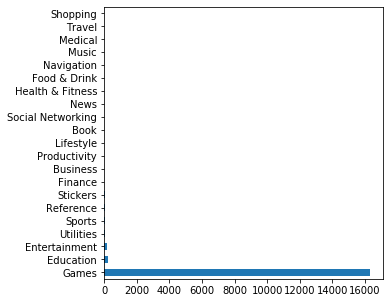

In [41]:
df['Primary Genre'].value_counts().plot(kind='barh', figsize=(5,5))

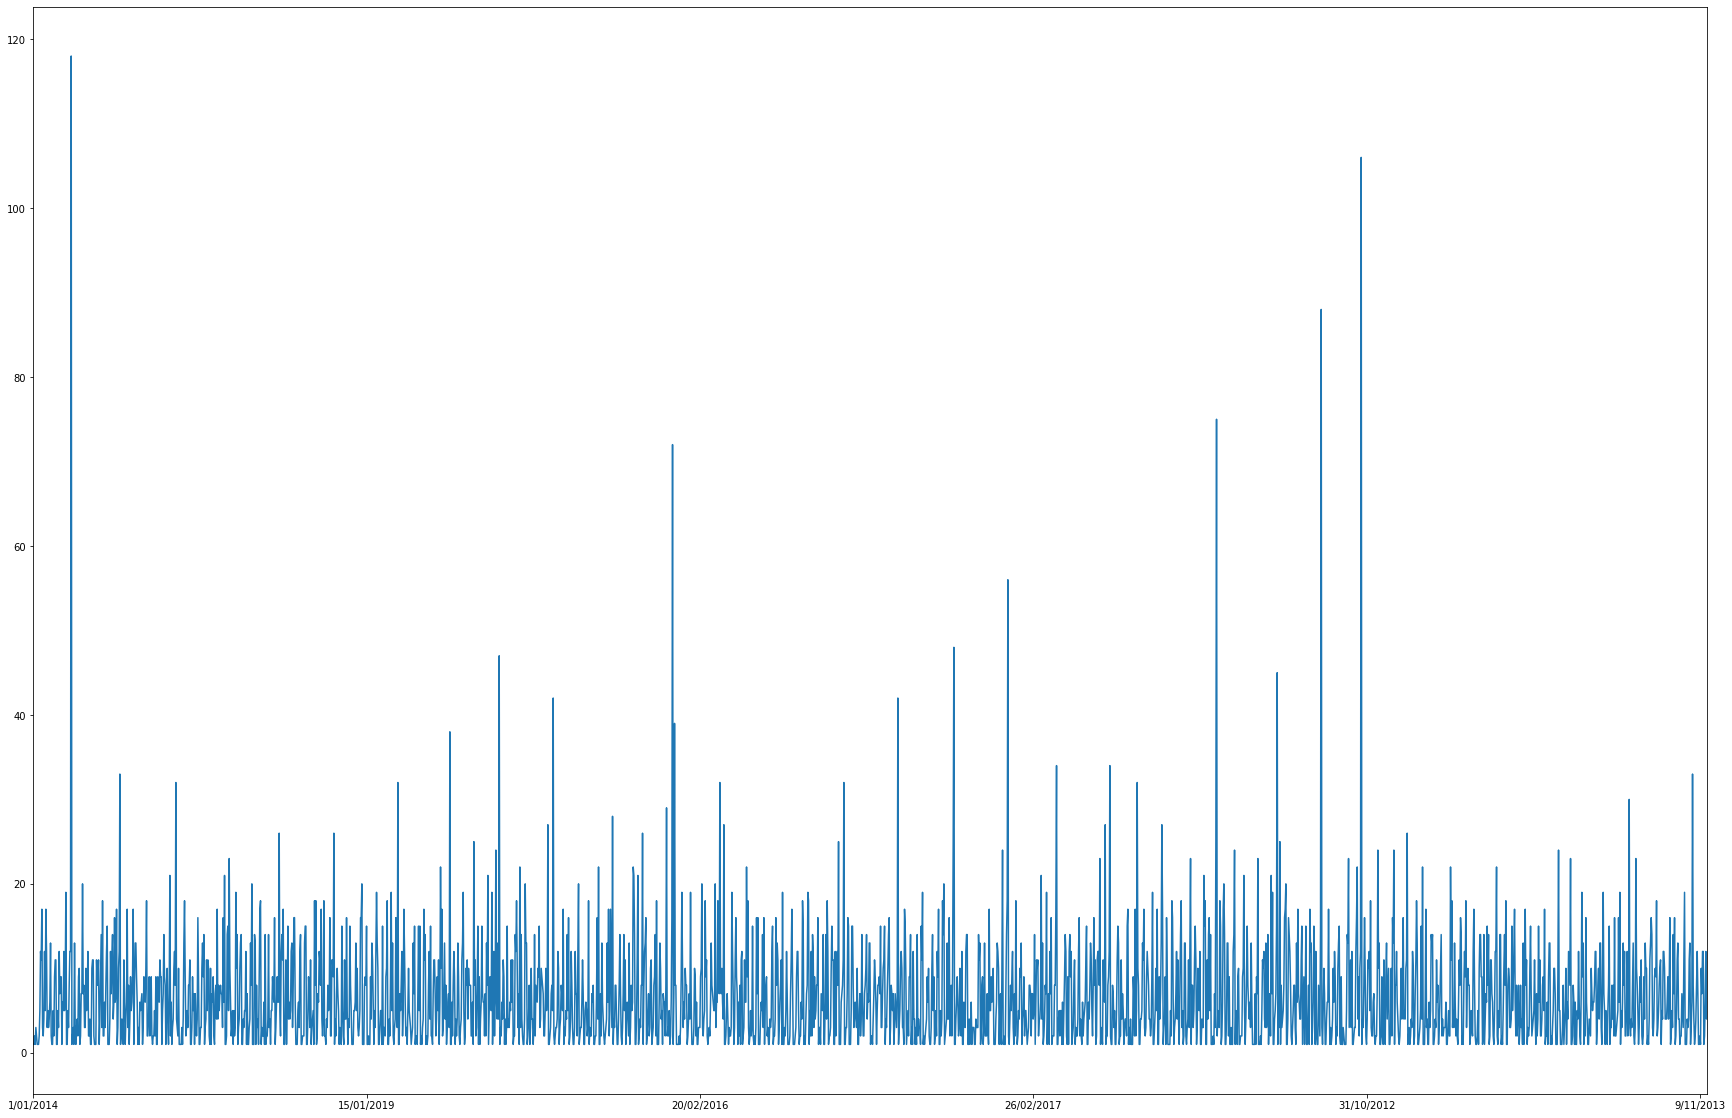

In [81]:
df['Current Version Release Date'].value_counts().sort_index().plot(kind='line', figsize=(30,20))